# Hypothesis Testing with Insurance Data (Core)
For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load the data

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers.
- Alternative Hypothesis: There is a significant difference in insurance charges between smokers and non-smokers.

## 2. Select the correct test according to the data type and number of samples

- Numeric
- Two groups/ samples
- 2-sample T-Test will be run

### Explore and separate data for hypothesis

In [3]:
# See how many are smokers and non-smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Create filter for smokers and non-smokers
smoker_df = df.loc[df['smoker']=='yes'].copy()
non_smoker_df = df.loc[df['smoker']=='no'].copy()

In [10]:
# Make a df just for visualization by concat the groups
plot_df = pd.concat([smoker_df, non_smoker_df])
plot_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [9]:
# Define the feature of interest
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

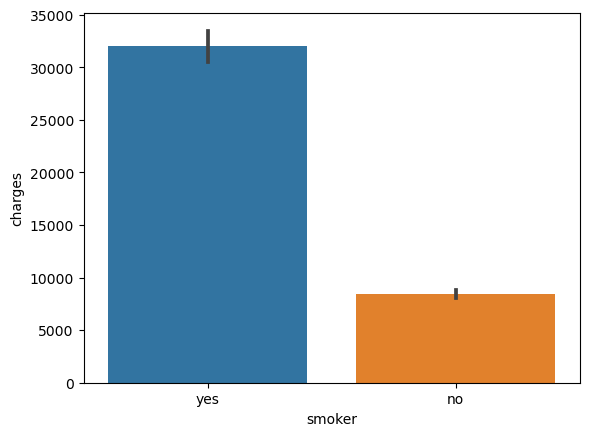

In [11]:
# Visualize the group means
sns.barplot(data=df, x='smoker', y='charges');

## 3. Test the assumptions of your selected test.

### Test Assumptions
- No significant outliers
- Normality
- Equal Variance

#### Check for and remove outliers

In [12]:
# Check for outliers in charges for smoker group
smoker_outliers = np.abs(stats.zscore(smoker_charges)) > 3
smoker_outliers.sum()

0

- No outliers are found in the smoker group.

In [13]:
# Check for outliers in charges for non-smoker group
non_smoker_outliers = np.abs(stats.zscore(non_smoker_charges)) > 3 
non_smoker_outliers.sum()

24

In [14]:
# Remove outliers from non_smoker group ONCE!
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

#### Test for Normality

In [15]:
# Test smoker group for normality
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [17]:
# Check n for smoker group
len(smoker_charges)

274

In [16]:
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [18]:
# Check n for non-smoker group
len(non_smoker_charges)

1040

- There is a large enough sample size to safely disregard the assumption of normality.

#### Check for Equal Variance

In [19]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We will therefore run a Welch's t-test instead by adding `equal_var=False` to `stats.ttest_ind`

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [21]:
result = stats.ttest_ind(smoker_charges, non_smoker_charges)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=51.2078044173717, pvalue=3.68768124e-315)


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 


We had a p-value < .05 for our Welch's t-test. We reject the null hypothesis and support the alternative that a significant difference in insurance charges between smokers and non-smokers.

## 6. Show a supporting visualization that helps display the result


In [ ]:
# 

## Q2. Are men more likely to smoke than women?

### 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis:
- Alternative Hypothesis:

### 2. Select the correct test according to the data type and number of samples

### 3. Test the assumptions of your selected test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


### 5. Interpret your p-value and reject or fail to reject your null hypothesis 


### 6. Show a supporting visualization that helps display the result


## Q3. Do different regions have different charges, on average?

### 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis:
- Alternative Hypothesis:

### 2. Select the correct test according to the data type and number of samples

### 3. Test the assumptions of your selected test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)


### 5. Interpret your p-value and reject or fail to reject your null hypothesis 


### 6. Show a supporting visualization that helps display the result
